<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.701543,136.727800,169.429343,121.489254,47.940089
1,0.0,1.0,46.631433,-251.727638,-195.096204,76.698920,-271.795124
2,0.0,2.0,67.261077,1415.075148,1492.336225,38.085761,1454.250464
3,0.0,3.0,44.895648,2.796376,57.692024,79.947843,-22.255819
4,0.0,4.0,54.070918,-18.398821,45.672097,62.774200,-17.102103
...,...,...,...,...,...,...,...
249995,999.0,245.0,91.601288,1686.610453,1788.211742,175.176450,1613.035292
249996,999.0,246.0,27.040493,94.970051,132.010544,56.342823,75.667721
249997,999.0,247.0,23.613060,-42.901969,-9.288909,50.034128,-59.323037
249998,999.0,248.0,76.695236,-357.145175,-270.449939,147.739671,-418.189610


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.701543,136.727800,169.429343,121.489254,47.940089
1,0.0,1.0,46.631433,-251.727638,-195.096204,76.698920,-271.795124
2,0.0,2.0,67.261077,1415.075148,1492.336225,38.085761,1454.250464
3,0.0,3.0,44.895648,2.796376,57.692024,79.947843,-22.255819
4,0.0,4.0,54.070918,-18.398821,45.672097,62.774200,-17.102103
...,...,...,...,...,...,...,...
249995,999.0,245.0,91.601288,1686.610453,1788.211742,175.176450,1613.035292
249996,999.0,246.0,27.040493,94.970051,132.010544,56.342823,75.667721
249997,999.0,247.0,23.613060,-42.901969,-9.288909,50.034128,-59.323037
249998,999.0,248.0,76.695236,-357.145175,-270.449939,147.739671,-418.189610


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    22.701543   136.727800   169.429343  121.489254    47.940089
      1.0    46.631433  -251.727638  -195.096204   76.698920  -271.795124
      2.0    67.261077  1415.075148  1492.336225   38.085761  1454.250464
      3.0    44.895648     2.796376    57.692024   79.947843   -22.255819
      4.0    54.070918   -18.398821    45.672097   62.774200   -17.102103
...                ...          ...          ...         ...          ...
999.0 245.0  91.601288  1686.610453  1788.211742  175.176450  1613.035292
      246.0  27.040493    94.970051   132.010544   56.342823    75.667721
      247.0  23.613060   -42.901969    -9.288909   50.034128   -59.323037
      248.0  76.695236  -357.145175  -270.449939  147.739671  -418.189610
      249.0  89.859369   742.197465   842.056834  171.970191   670.086643

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    22.701543   136.727800   169.429343  121.489254    47.940089
      1.0    46.631433  -251.727638  -195.096204   76.698920  -271.795124
      2.0    67.261077  1415.075148  1492.336225   38.085761  1454.250464
      3.0    44.895648     2.796376    57.692024   79.947843   -22.255819
      4.0    54.070918   -18.398821    45.672097   62.774200   -17.102103
...                ...          ...          ...         ...          ...
999.0 245.0  91.601288  1686.610453  1788.211742  175.176450  1613.035292
      246.0  27.040493    94.970051   132.010544   56.342823    75.667721
      247.0  23.613060   -42.901969    -9.288909   50.034128   -59.323037
      248.0  76.695236  -357.145175  -270.449939  147.739671  -418.189610
      249.0  89.859369   742.197465   842.056834  171.970191   670.086643

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.701543,136.727800,169.429343,121.489254,47.940089
1,0.0,1.0,46.631433,-251.727638,-195.096204,76.698920,-271.795124
2,0.0,2.0,67.261077,1415.075148,1492.336225,38.085761,1454.250464
3,0.0,3.0,44.895648,2.796376,57.692024,79.947843,-22.255819
4,0.0,4.0,54.070918,-18.398821,45.672097,62.774200,-17.102103
...,...,...,...,...,...,...,...
249995,999.0,245.0,91.601288,1686.610453,1788.211742,175.176450,1613.035292
249996,999.0,246.0,27.040493,94.970051,132.010544,56.342823,75.667721
249997,999.0,247.0,23.613060,-42.901969,-9.288909,50.034128,-59.323037
249998,999.0,248.0,76.695236,-357.145175,-270.449939,147.739671,-418.189610


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    22.701543   136.727800   169.429343  121.489254    47.940089
      1.0    46.631433  -251.727638  -195.096204   76.698920  -271.795124
      2.0    67.261077  1415.075148  1492.336225   38.085761  1454.250464
      3.0    44.895648     2.796376    57.692024   79.947843   -22.255819
      4.0    54.070918   -18.398821    45.672097   62.774200   -17.102103
...                ...          ...          ...         ...          ...
999.0 245.0  91.601288  1686.610453  1788.211742  175.176450  1613.035292
      246.0  27.040493    94.970051   132.010544   56.342823    75.667721
      247.0  23.613060   -42.901969    -9.288909   50.034128   -59.323037
      248.0  76.695236  -357.145175  -270.449939  147.739671  -418.189610
      249.0  89.859369   742.197465   842.056834  171.970191   670.086643

[250000 rows x 5 columns]

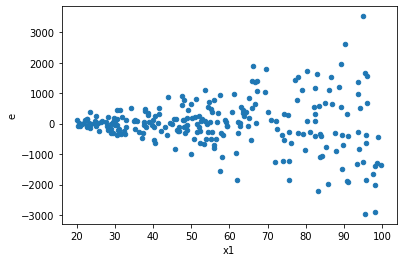

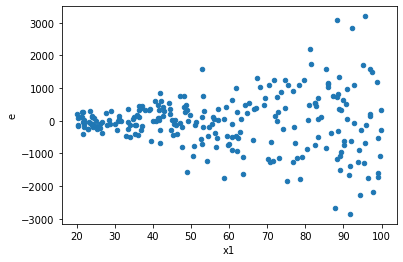

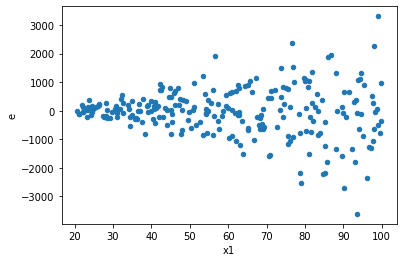

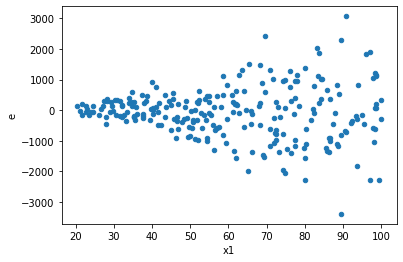

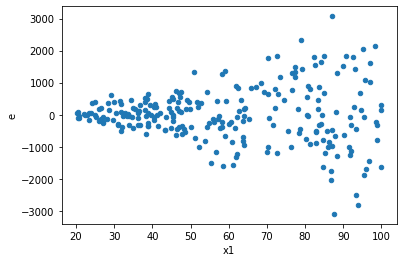

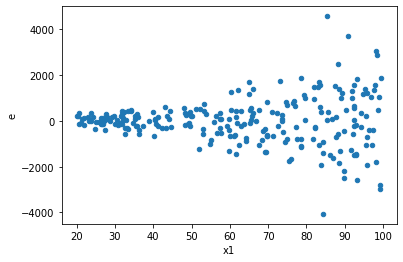

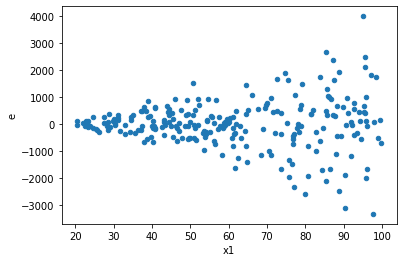

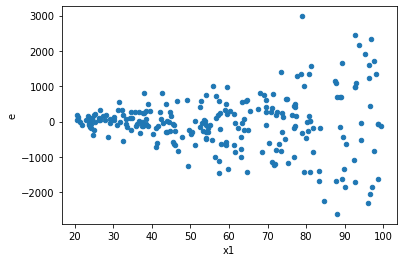

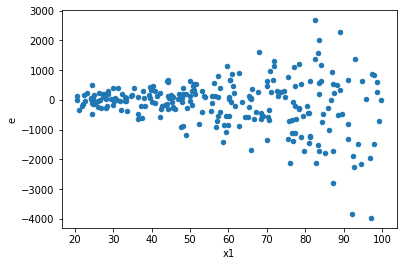

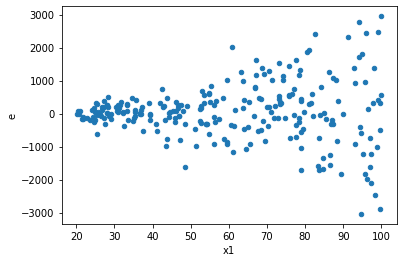

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,99.0,99.0,9328670.51142694,144030408.1837575,94228.99506491859,1454852.6079167426,15.439542859545824,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,9877930.524498146,139925625.0240662,99777.07600503178,1413390.1517582445,14.165479770994361,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,11207590.912147066,213684264.56341696,113207.98901158653,2158426.9147819895,19.06603000041879,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,15094787.74371278,165328087.618569,152472.60347184626,1669980.6830158483,10.952660641911363,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,9928118.697377693,129386768.00936696,100284.02724623932,1306937.0505996663,13.032355066780356,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,99.0,99.0,10814295.80958538,149562552.31277588,109235.31120793312,1510732.8516442007,13.830077792047202,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,99.0,99.0,12544914.652424183,167291005.31668717,126716.30962044629,1689808.1345119916,13.33536416561908,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,99.0,99.0,12211525.761114594,147473870.94287506,123348.74506176358,1489635.060029041,12.076613015261293,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,99.0,99.0,10760977.419286232,168463975.97764337,108696.74160895184,1701656.3230064986,15.655081263874399,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,131059633.38179442,8051302.59360745,1323834.680624186,81326.28882431767,0.06143236010856918,1.657875693192188e-34,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,9328670.51142694,144030408.1837575,94228.99506491859,1454852.6079167426,15.439542859545824,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,137837286.05785003,12138298.359929888,1392295.818766162,122609.07434272613,0.08806251709595811,8.285318515559653e-28,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,135429577.8994258,12515358.087492583,1367975.5343376345,126417.75845952105,0.09241229487392241,6.122597650775972e-27,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,9877930.524498146,139925625.0240662,99777.07600503178,1413390.1517582445,14.165479770994361,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,11207590.912147066,213684264.56341696,113207.98901158653,2158426.9147819895,19.06603000041879,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,15094787.74371278,165328087.618569,152472.60347184626,1669980.6830158483,10.952660641911363,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,9928118.697377693,129386768.00936696,100284.02724623932,1306937.0505996663,13.032355066780356,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,137401413.03962937,10066993.851438072,1387893.0610063572,101686.80658018254,0.07326703291278777,3.4689487388729274e-31,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64